In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [3]:
covid_df[covid_df['fips'].isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...
1741034,2021-09-21,Unknown,Puerto Rico,NaN,5299,3092.0
1741046,2021-09-21,Unknown,Rhode Island,NaN,15949,25.0
1741247,2021-09-21,Unknown,Tennessee,NaN,6933,104.0
1741534,2021-09-21,Unknown,Utah,NaN,1600,33.0


In [4]:
covid_df[covid_df['deaths'].isnull()]

,date,county,state,fips,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN
...,...,...,...,...,...,...
1741037,2021-09-21,Vega Baja,Puerto Rico,72145.0,4327,NaN
1741038,2021-09-21,Vieques,Puerto Rico,72147.0,260,NaN
1741039,2021-09-21,Villalba,Puerto Rico,72149.0,1012,NaN
1741040,2021-09-21,Yabucoa,Puerto Rico,72151.0,1597,NaN


In [5]:
covid_df.shape

(1741880, 6)

In [6]:
covid_df.dropna(subset=['fips'], inplace=True)

In [7]:
covid_df.shape

(1726023, 6)

In [ ]:
covid_df.fillna(covid_df.mean(), inplace=True)

In [8]:
from sklearn.impute import SimpleImputer

numeric_columns = covid_df.select_dtypes(include='number').columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_death_data = imp.fit_transform(covid_df[numeric_columns])
covid_df[numeric_columns] = pd.DataFrame(imputed_death_data)

In [9]:
covid_df.loc[covid_df.state=='Puerto Rico', :]

,date,county,state,fips,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,16083.0,231.0,11.0
117487,2020-05-05,Aguada,Puerto Rico,16085.0,2.0,0.0
117488,2020-05-05,Aguadilla,Puerto Rico,16087.0,1.0,0.0
117489,2020-05-05,Aguas Buenas,Puerto Rico,17001.0,40.0,1.0
117490,2020-05-05,Aibonito,Puerto Rico,17003.0,6.0,0.0
...,...,...,...,...,...,...
1741037,2021-09-21,Vega Baja,Puerto Rico,NaN,NaN,NaN
1741038,2021-09-21,Vieques,Puerto Rico,NaN,NaN,NaN
1741039,2021-09-21,Villalba,Puerto Rico,NaN,NaN,NaN
1741040,2021-09-21,Yabucoa,Puerto Rico,NaN,NaN,NaN


In [10]:
ohe_covid_df = pd.get_dummies(covid_df, columns=['state'])

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labelled_data = le.fit_transform(covid_df['state'])
covid_df['state_number'] = pd.Series(labelled_data)
covid_df

,date,county,state,fips,cases,deaths,state_number
0,2020-01-21,Snohomish,Washington,53061.0,1.0,0.0,50.0
1,2020-01-22,Snohomish,Washington,53061.0,1.0,0.0,50.0
2,2020-01-23,Snohomish,Washington,53061.0,1.0,0.0,50.0
3,2020-01-24,Cook,Illinois,17031.0,1.0,0.0,13.0
4,2020-01-24,Snohomish,Washington,53061.0,1.0,0.0,50.0
...,...,...,...,...,...,...,...
1741875,2021-09-21,Sweetwater,Wyoming,NaN,NaN,NaN,NaN
1741876,2021-09-21,Teton,Wyoming,NaN,NaN,NaN,NaN
1741877,2021-09-21,Uinta,Wyoming,NaN,NaN,NaN,NaN
1741878,2021-09-21,Washakie,Wyoming,NaN,NaN,NaN,NaN


Text(0.5, 0, '# of Deaths on a Given Day')

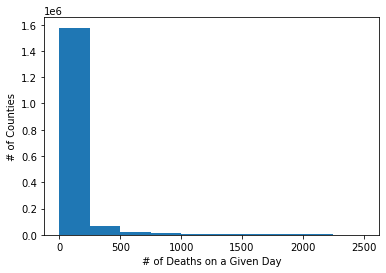

In [12]:
plt.hist(covid_df['deaths'], range=(0,2500))
plt.ylabel('# of Counties')
plt.xlabel('# of Deaths on a Given Day')

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_deaths = sc.fit_transform(covid_df['deaths'].values.reshape(-1,1))

Text(0.5, 0, '# of Standard Deviations of Deaths')

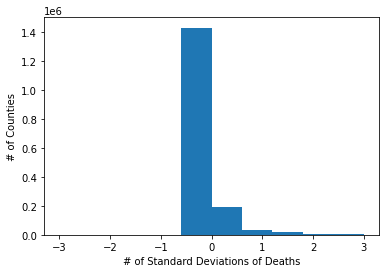

In [14]:
plt.hist(scaled_deaths, range=(-3,3))
plt.ylabel('# of Counties')
plt.xlabel('# of Standard Deviations of Deaths')